# Preamble
## Setup of environment

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/voxelMorph/source_code/

Mounted at /content/gdrive
/content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2/voxelMorph/source_code


In [2]:
!pip install tqdm -q
!pip install pydicom -q
!pip install pypng -q

     |████████████████████████████████| 1.9MB 29.3MB/s 
     |████████████████████████████████| 655kB 30.7MB/s 


In [3]:
# imports
import os, sys
import os, sys
import glob
from tqdm import tqdm
import pydicom
import png
import numpy as np
import os
import shutil

# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.'), 'This tutorial assumes Tensorflow 2.0+'
tf.executing_eagerly()

True

In [4]:
!pip install .

Processing /content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2/voxelMorph/source_code
     |████████████████████████████████| 92kB 11.7MB/s 
  Created wheel for voxelmorph: filename=voxelmorph-0.1-cp37-none-any.whl size=63863 sha256=d2452133a971d25e0ea578cd90a091e74699760505e26e8db3f25a9921d31244
  Stored in directory: /tmp/pip-ephem-wheel-cache-aahh0suc/wheels/44/73/f1/57381de42b83fd8cc48c0d8eb63ef1a0fdf5817f431b72f2fc
Successfully built voxelmorph


In [5]:
# local imports
import voxelmorph as vxm
import neurite as ne

---

# Data

In [6]:
%cd ../

/content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2/voxelMorph


## Store and Organize

In [7]:
def get_file_count(main_path):
  i = 0
  print()
  for path in tqdm(glob.iglob(main_path + '**/*.png' , recursive=True) , desc = "Reading"):
      i+=1  
  print('total images:', i)

def remove_files(main_path):
  if main_path == './dataset/':
    print("idiot!")
    return
  print()
  for path in tqdm(glob.iglob(main_path + '**/*.png' , recursive=True) , desc = "Reading"):
    os.remove(path)
    print(path + " removed.")

In [ ]:
def categorize_into_folders(main_path, cine_path, lge_path, rigid_lge_path, scar_eliminated_path, scar_eliminated_v2_path, rigid_mask_path):
  for path in tqdm(glob.iglob('./dataset_vxm/' + '**/*/*.png' , recursive=True) , desc = "Reading"):
    os.remove(path)
  bad_dim_folders = ['1512388', '1544127', '1562533', '1574347', '1190801', '1606622', '1607269', '1608050', '1608412', '1612583', '1421246', '1421322', '1482797', '1398155', '1429840', '1498178', '1535532']
  i = 0
  cine_counter = 0
  lge_counter = 0
  rigid_lge_counter = 0;
  scar_eliminated_counter = 0;
  scar_eliminated_v2_counter = 0;
  rigid_mask_counter = 0
  print()
  for path in tqdm(glob.iglob(main_path + '**/results/*.png' , recursive=True) , desc = "Reading"):
    bad_dim_detected = False
    for bad_dim in bad_dim_folders:
      if bad_dim in path:
        bad_dim_detected = True
        break
    if bad_dim_detected:
      continue
    file_name = path.split('/')[-1]
    if 'unknown' in file_name:
      continue
    image_type = file_name.split('_')[-1]
    if file_name == 'rigid_lge.png':
      rigid_lge_counter += 1;
      des_path = rigid_lge_path + str(rigid_lge_counter) + '_' + file_name
      i+=1
    elif file_name == 'scar_eliminated_rigid_lge.png':
      scar_eliminated_counter += 1;
      des_path = scar_eliminated_path + str(scar_eliminated_counter) + '_' + file_name
      i+=1
    elif file_name == 'scar_eliminated_rigid_lge_v2.png':
      scar_eliminated_v2_counter += 1;
      des_path = scar_eliminated_v2_path + str(scar_eliminated_v2_counter) + '_' + file_name
      i+=1
    elif 'rigid_mask_' in file_name:
        rigid_mask_counter +=1
        des_path = rigid_mask_path + str(rigid_mask_counter) + '_' + file_name
        i+=1
    elif image_type == 'cine.png':
      if cine_counter > lge_counter or cine_counter > rigid_lge_counter:
        print("Error!")
        break
      cine_counter += 1
      des_path = cine_path + str(cine_counter) + '_' + file_name
      i+=1  
    elif image_type == 'lge.png':
      if lge_counter > cine_counter:
        print("Error!")
        break
      lge_counter += 1
      des_path = lge_path + str(lge_counter) + '_' + file_name
      i+=1  
    else: 
      continue
    shutil.copyfile(path, des_path)
    print('number:' , i , "| name:" , path, "copied.")

In [ ]:
main_path = '../dataset/'
cine_path = './dataset_vxm/cine/'
lge_path = './dataset_vxm/lge/'
rigid_lge_path = './dataset_vxm/rigid_lge/'
scar_eliminated_path = './dataset_vxm/scar_eliminated/'
scar_eliminated_v2_path = './dataset_vxm/scar_eliminated_v2/'
rigid_mask_path = './dataset_vxm/rigid_mask/'
categorize_into_folders(main_path, cine_path, lge_path, rigid_lge_path, scar_eliminated_path, scar_eliminated_v2_path, rigid_mask_path)

Reading: 0it [00:00, ?it/s]
Reading: 0it [00:00, ?it/s]


number: 1 | name: ../dataset/ok3/1602959/3/results/img0022--57.0417_cine.png copied.
number: 2 | name: ../dataset/ok3/1602959/3/results/img0007--55.2576_lge.png copied.
number: 3 | name: ../dataset/ok3/1602959/3/results/rigid_lge.png copied.
number: 4 | name: ../dataset/ok3/1602959/3/results/rigid_mask_19.png copied.
number: 5 | name: ../dataset/ok3/1602959/3/results/scar_eliminated_rigid_lge.png copied.
number: 6 | name: ../dataset/ok3/1602959/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 7 | name: ../dataset/ok3/1602959/1/results/img0022--74.5417_cine.png copied.
number: 8 | name: ../dataset/ok3/1602959/1/results/img0005--71.2576_lge.png copied.
number: 9 | name: ../dataset/ok3/1602959/1/results/rigid_lge.png copied.
number: 10 | name: ../dataset/ok3/1602959/1/results/rigid_mask_25.png copied.
number: 11 | name: ../dataset/ok3/1602959/1/results/scar_eliminated_rigid_lge.png copied.
number: 12 | name: ../dataset/ok3/1602959/1/results/scar_eliminated_rigid_lge_v2.png copi

Reading: 41it [00:00, 116.37it/s]

number: 15 | name: ../dataset/ok3/1602959/4/results/rigid_lge.png copied.
number: 16 | name: ../dataset/ok3/1602959/4/results/rigid_mask_35.png copied.
number: 17 | name: ../dataset/ok3/1602959/4/results/scar_eliminated_rigid_lge.png copied.
number: 18 | name: ../dataset/ok3/1602959/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 19 | name: ../dataset/ok3/1602959/5/results/img0022--39.5417_cine.png copied.
number: 20 | name: ../dataset/ok3/1602959/5/results/img0009--39.2576_lge.png copied.
number: 21 | name: ../dataset/ok3/1602959/5/results/rigid_lge.png copied.
number: 22 | name: ../dataset/ok3/1602959/5/results/rigid_mask_12.png copied.
number: 23 | name: ../dataset/ok3/1602959/5/results/scar_eliminated_rigid_lge.png copied.
number: 24 | name: ../dataset/ok3/1602959/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 25 | name: ../dataset/ok3/1616960/4/results/img0025--72.2279_cine.png copied.
number: 26 | name: ../dataset/ok3/1616960/4/results/img0011--69.5681_lge.

Reading: 49it [00:00, 87.02it/s] 

number: 33 | name: ../dataset/ok3/1616960/2/results/rigid_lge.png copied.
number: 34 | name: ../dataset/ok3/1616960/2/results/rigid_mask_5.png copied.
number: 35 | name: ../dataset/ok3/1616960/2/results/scar_eliminated_rigid_lge.png copied.
number: 36 | name: ../dataset/ok3/1616960/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 37 | name: ../dataset/ok3/1616960/1/results/img0025--101.028_cine.png copied.
number: 38 | name: ../dataset/ok3/1616960/1/results/img0007--101.568_lge.png copied.
number: 39 | name: ../dataset/ok3/1616960/1/results/rigid_lge.png copied.
number: 40 | name: ../dataset/ok3/1616960/1/results/rigid_mask_8.png copied.
number: 41 | name: ../dataset/ok3/1616960/1/results/scar_eliminated_rigid_lge.png copied.
number: 42 | name: ../dataset/ok3/1616960/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 43 | name: ../dataset/ok3/1616960/3/results/img0025--81.8279_cine.png copied.
number: 44 | name: ../dataset/ok3/1616960/3/results/img0009--85.5681_lge.pn

Reading: 89it [00:00, 110.68it/s]

number: 51 | name: ../dataset/ok3/1617584/2/results/rigid_lge.png copied.
number: 52 | name: ../dataset/ok3/1617584/2/results/rigid_mask_11.png copied.
number: 53 | name: ../dataset/ok3/1617584/2/results/scar_eliminated_rigid_lge.png copied.
number: 54 | name: ../dataset/ok3/1617584/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 55 | name: ../dataset/ok3/1617584/3/results/img0001-67.6799_lge.png copied.
number: 56 | name: ../dataset/ok3/1617584/3/results/img0023-64.4081_cine.png copied.
number: 57 | name: ../dataset/ok3/1617584/3/results/rigid_lge.png copied.
number: 58 | name: ../dataset/ok3/1617584/3/results/rigid_mask_19.png copied.
number: 59 | name: ../dataset/ok3/1617584/3/results/scar_eliminated_rigid_lge.png copied.
number: 60 | name: ../dataset/ok3/1617584/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 61 | name: ../dataset/ok3/1617584/1/results/img0001-48.4799_lge.png copied.
number: 62 | name: ../dataset/ok3/1617584/1/results/img0023-48.3081_cine.png 

Reading: 146it [00:01, 130.70it/s]

number: 71 | name: ../dataset/ok3/1617584/4/results/scar_eliminated_rigid_lge.png copied.
number: 72 | name: ../dataset/ok3/1617584/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 73 | name: ../dataset/ok3/1601149/2/results/img0021-132.302_cine.png copied.
number: 74 | name: ../dataset/ok3/1601149/2/results/img0007--128.647_lge.png copied.
number: 75 | name: ../dataset/ok3/1601149/2/results/rigid_lge.png copied.
number: 76 | name: ../dataset/ok3/1601149/2/results/rigid_mask_53.png copied.
number: 77 | name: ../dataset/ok3/1601149/2/results/scar_eliminated_rigid_lge.png copied.
number: 78 | name: ../dataset/ok3/1601149/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 79 | name: ../dataset/ok3/1601149/4/results/img0021-116.202_cine.png copied.
number: 80 | name: ../dataset/ok3/1601149/4/results/img0005--112.647_lge.png copied.
number: 81 | name: ../dataset/ok3/1601149/4/results/rigid_lge.png copied.
number: 82 | name: ../dataset/ok3/1601149/4/results/rigid_mask_44.pn

Reading: 168it [00:01, 148.10it/s]

number: 88 | name: ../dataset/ok3/1601149/3/results/rigid_mask_43.png copied.
number: 89 | name: ../dataset/ok3/1601149/3/results/scar_eliminated_rigid_lge.png copied.
number: 90 | name: ../dataset/ok3/1601149/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 91 | name: ../dataset/ok3/1601149/1/results/img0021-140.352_cine.png copied.
number: 92 | name: ../dataset/ok3/1601149/1/results/img0008--136.647_lge.png copied.
number: 93 | name: ../dataset/ok3/1601149/1/results/rigid_lge.png copied.
number: 94 | name: ../dataset/ok3/1601149/1/results/rigid_mask_48.png copied.
number: 95 | name: ../dataset/ok3/1601149/1/results/scar_eliminated_rigid_lge.png copied.
number: 96 | name: ../dataset/ok3/1601149/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 97 | name: ../dataset/ok1,2/423841/1/results/img0007-51.1166_lge.png copied.
number: 98 | name: ../dataset/ok1,2/423841/1/results/img0015-48.6138_cine.png copied.
number: 99 | name: ../dataset/ok1,2/423841/1/results/rigid_lge.

Reading: 186it [00:01, 128.69it/s]

number: 107 | name: ../dataset/ok1,2/423841/2/results/scar_eliminated_rigid_lge.png copied.
number: 108 | name: ../dataset/ok1,2/423841/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 109 | name: ../dataset/ok1,2/423841/3/results/img0015-65.4138_cine.png copied.
number: 110 | name: ../dataset/ok1,2/423841/3/results/img0009-67.1166_lge.png copied.
number: 111 | name: ../dataset/ok1,2/423841/3/results/rigid_lge.png copied.
number: 112 | name: ../dataset/ok1,2/423841/3/results/rigid_mask_49.png copied.
number: 113 | name: ../dataset/ok1,2/423841/3/results/scar_eliminated_rigid_lge.png copied.
number: 114 | name: ../dataset/ok1,2/423841/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 115 | name: ../dataset/ok1,2/423841/4/results/img0010-75.1166_lge.png copied.
number: 116 | name: ../dataset/ok1,2/423841/4/results/img0015-73.8138_cine.png copied.
number: 117 | name: ../dataset/ok1,2/423841/4/results/rigid_lge.png copied.
number: 118 | name: ../dataset/ok1,2/423841/4/re

Reading: 216it [00:01, 107.62it/s]

number: 125 | name: ../dataset/ok1,2/746603/5/results/scar_eliminated_rigid_lge.png copied.
number: 126 | name: ../dataset/ok1,2/746603/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 127 | name: ../dataset/ok1,2/746603/4/results/img0019--82.0208_cine.png copied.
number: 128 | name: ../dataset/ok1,2/746603/4/results/img0008--82.0209_lge.png copied.
number: 129 | name: ../dataset/ok1,2/746603/4/results/rigid_lge.png copied.
number: 130 | name: ../dataset/ok1,2/746603/4/results/rigid_mask_15.png copied.
number: 131 | name: ../dataset/ok1,2/746603/4/results/scar_eliminated_rigid_lge.png copied.
number: 132 | name: ../dataset/ok1,2/746603/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 133 | name: ../dataset/ok1,2/746603/6/results/img0019--67.6208_cine.png copied.
number: 134 | name: ../dataset/ok1,2/746603/6/results/img0010--66.0209_lge.png copied.
number: 135 | name: ../dataset/ok1,2/746603/6/results/rigid_lge.png copied.
number: 136 | name: ../dataset/ok1,2/746603/

Reading: 234it [00:01, 122.23it/s]

number: 140 | name: ../dataset/ok1,2/746603/7/results/img0011--58.0209_lge.png copied.
number: 141 | name: ../dataset/ok1,2/746603/7/results/rigid_lge.png copied.
number: 142 | name: ../dataset/ok1,2/746603/7/results/rigid_mask_10.png copied.
number: 143 | name: ../dataset/ok1,2/746603/7/results/scar_eliminated_rigid_lge.png copied.
number: 144 | name: ../dataset/ok1,2/746603/7/results/scar_eliminated_rigid_lge_v2.png copied.
number: 145 | name: ../dataset/ok1,2/928508/4/results/img0017-75.2726_cine.png copied.
number: 146 | name: ../dataset/ok1,2/928508/4/results/img0007--73.0498_lge.png copied.
number: 147 | name: ../dataset/ok1,2/928508/4/results/rigid_lge.png copied.
number: 148 | name: ../dataset/ok1,2/928508/4/results/rigid_mask_14.png copied.
number: 149 | name: ../dataset/ok1,2/928508/4/results/scar_eliminated_rigid_lge.png copied.
number: 150 | name: ../dataset/ok1,2/928508/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 151 | name: ../dataset/ok1,2/928508/3/results

Reading: 262it [00:02, 105.46it/s]

number: 161 | name: ../dataset/ok1,2/928508/7/results/scar_eliminated_rigid_lge.png copied.
number: 162 | name: ../dataset/ok1,2/928508/7/results/scar_eliminated_rigid_lge_v2.png copied.
number: 163 | name: ../dataset/ok1,2/928508/5/results/img0017-66.2726_cine.png copied.
number: 164 | name: ../dataset/ok1,2/928508/5/results/img0008--63.0498_lge.png copied.
number: 165 | name: ../dataset/ok1,2/928508/5/results/rigid_lge.png copied.
number: 166 | name: ../dataset/ok1,2/928508/5/results/rigid_mask_20.png copied.
number: 167 | name: ../dataset/ok1,2/928508/5/results/scar_eliminated_rigid_lge.png copied.
number: 168 | name: ../dataset/ok1,2/928508/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 169 | name: ../dataset/ok1,2/1136533/5/results/img0021-69.6665_cine.png copied.
number: 170 | name: ../dataset/ok1,2/1136533/5/results/img0009-66.471_lge.png copied.
number: 171 | name: ../dataset/ok1,2/1136533/5/results/rigid_lge.png copied.
number: 172 | name: ../dataset/ok1,2/1136533/

Reading: 294it [00:02, 114.47it/s]

number: 177 | name: ../dataset/ok1,2/1136533/4/results/rigid_lge.png copied.
number: 178 | name: ../dataset/ok1,2/1136533/4/results/rigid_mask_23.png copied.
number: 179 | name: ../dataset/ok1,2/1136533/4/results/scar_eliminated_rigid_lge.png copied.
number: 180 | name: ../dataset/ok1,2/1136533/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 181 | name: ../dataset/ok1,2/1136533/3/results/img0021-51.9665_cine.png copied.
number: 182 | name: ../dataset/ok1,2/1136533/3/results/img0007-50.471_lge.png copied.
number: 183 | name: ../dataset/ok1,2/1136533/3/results/rigid_lge.png copied.
number: 184 | name: ../dataset/ok1,2/1136533/3/results/rigid_mask_30.png copied.
number: 185 | name: ../dataset/ok1,2/1136533/3/results/scar_eliminated_rigid_lge.png copied.
number: 186 | name: ../dataset/ok1,2/1136533/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 187 | name: ../dataset/ok1,2/1136533/2/results/img0021-43.1165_cine.png copied.
number: 188 | name: ../dataset/ok1,2/1136533

Reading: 307it [00:02, 103.13it/s]

number: 197 | name: ../dataset/ok1,2/1216198/1/results/scar_eliminated_rigid_lge.png copied.
number: 198 | name: ../dataset/ok1,2/1216198/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 199 | name: ../dataset/ok1,2/1216198/4/results/img0001-58.439_cine.png copied.
number: 200 | name: ../dataset/ok1,2/1216198/4/results/img0008-54.0985_lge.png copied.
number: 201 | name: ../dataset/ok1,2/1216198/4/results/rigid_lge.png copied.
number: 202 | name: ../dataset/ok1,2/1216198/4/results/rigid_mask_22.png copied.
number: 203 | name: ../dataset/ok1,2/1216198/4/results/scar_eliminated_rigid_lge.png copied.
number: 204 | name: ../dataset/ok1,2/1216198/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 205 | name: ../dataset/ok1,2/1216198/3/results/img0001-48.199_cine.png copied.
number: 206 | name: ../dataset/ok1,2/1216198/3/results/img0007-44.0985_lge.png copied.
number: 207 | name: ../dataset/ok1,2/1216198/3/results/rigid_lge.png copied.
number: 208 | name: ../dataset/ok1,2/12

Reading: 342it [00:02, 111.82it/s]

number: 216 | name: ../dataset/ok1,2/1216198/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 217 | name: ../dataset/ok1,2/1247592/1/results/img0014-63.1287_cine.png copied.
number: 218 | name: ../dataset/ok1,2/1247592/1/results/img0007-66.1787_lge.png copied.
number: 219 | name: ../dataset/ok1,2/1247592/1/results/rigid_lge.png copied.
number: 220 | name: ../dataset/ok1,2/1247592/1/results/rigid_mask_29.png copied.
number: 221 | name: ../dataset/ok1,2/1247592/1/results/scar_eliminated_rigid_lge.png copied.
number: 222 | name: ../dataset/ok1,2/1247592/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 223 | name: ../dataset/ok1,2/1247592/4/results/img0014-95.3288_cine.png copied.
number: 224 | name: ../dataset/ok1,2/1247592/4/results/img0010-96.1788_lge.png copied.
number: 225 | name: ../dataset/ok1,2/1247592/4/results/rigid_lge.png copied.
number: 226 | name: ../dataset/ok1,2/1247592/4/results/rigid_mask_35.png copied.
number: 227 | name: ../dataset/ok1,2/1247592/4/re

Reading: 366it [00:02, 122.53it/s]

number: 234 | name: ../dataset/ok1,2/1247592/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 235 | name: ../dataset/ok1,2/1247592/2/results/img0014-79.2287_cine.png copied.
number: 236 | name: ../dataset/ok1,2/1247592/2/results/img0008-76.1787_lge.png copied.
number: 237 | name: ../dataset/ok1,2/1247592/2/results/rigid_lge.png copied.
number: 238 | name: ../dataset/ok1,2/1247592/2/results/rigid_mask_24.png copied.
number: 239 | name: ../dataset/ok1,2/1247592/2/results/scar_eliminated_rigid_lge.png copied.
number: 240 | name: ../dataset/ok1,2/1247592/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 241 | name: ../dataset/ok1,2/1513957/3/results/img0018-79.5298_cine.png copied.
number: 242 | name: ../dataset/ok1,2/1513957/3/results/img0005--77.3149_lge.png copied.
number: 243 | name: ../dataset/ok1,2/1513957/3/results/rigid_lge.png copied.
number: 244 | name: ../dataset/ok1,2/1513957/3/results/rigid_mask_41.png copied.
number: 245 | name: ../dataset/ok1,2/1513957/3/r

Reading: 404it [00:03, 123.43it/s]

number: 254 | name: ../dataset/ok1,2/1513957/5/results/img0007--61.3149_lge.png copied.
number: 255 | name: ../dataset/ok1,2/1513957/5/results/rigid_lge.png copied.
number: 256 | name: ../dataset/ok1,2/1513957/5/results/rigid_mask_23.png copied.
number: 257 | name: ../dataset/ok1,2/1513957/5/results/scar_eliminated_rigid_lge.png copied.
number: 258 | name: ../dataset/ok1,2/1513957/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 259 | name: ../dataset/ok1,2/1513957/4/results/img0018-71.4798_cine.png copied.
number: 260 | name: ../dataset/ok1,2/1513957/4/results/img0006--69.3149_lge.png copied.
number: 261 | name: ../dataset/ok1,2/1513957/4/results/rigid_lge.png copied.
number: 262 | name: ../dataset/ok1,2/1513957/4/results/rigid_mask_27.png copied.
number: 263 | name: ../dataset/ok1,2/1513957/4/results/scar_eliminated_rigid_lge.png copied.
number: 264 | name: ../dataset/ok1,2/1513957/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 265 | name: ../dataset/ok1,2/15514

Reading: 418it [00:03, 113.29it/s]

number: 271 | name: ../dataset/ok1,2/1551489/3/results/img0020-54.9148_cine.png copied.
number: 272 | name: ../dataset/ok1,2/1551489/3/results/img0004-54.5993_lge.png copied.
number: 273 | name: ../dataset/ok1,2/1551489/3/results/rigid_lge.png copied.
number: 274 | name: ../dataset/ok1,2/1551489/3/results/rigid_mask_44.png copied.
number: 275 | name: ../dataset/ok1,2/1551489/3/results/scar_eliminated_rigid_lge.png copied.
number: 276 | name: ../dataset/ok1,2/1551489/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 277 | name: ../dataset/ok1,2/1551489/4/results/img0020-63.8748_cine.png copied.
number: 278 | name: ../dataset/ok1,2/1551489/4/results/img0005-64.5993_lge.png copied.
number: 279 | name: ../dataset/ok1,2/1551489/4/results/rigid_lge.png copied.
number: 280 | name: ../dataset/ok1,2/1551489/4/results/rigid_mask_54.png copied.
number: 281 | name: ../dataset/ok1,2/1551489/4/results/scar_eliminated_rigid_lge.png copied.
number: 282 | name: ../dataset/ok1,2/1551489/4/resul

Reading: 436it [00:03, 107.74it/s]

number: 292 | name: ../dataset/ok1,2/1515081/5/results/rigid_mask_0.png copied.
number: 293 | name: ../dataset/ok1,2/1515081/5/results/scar_eliminated_rigid_lge.png copied.
number: 294 | name: ../dataset/ok1,2/1515081/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 295 | name: ../dataset/ok1,2/1515081/8/results/img0021--76.1905_cine.png copied.
number: 296 | name: ../dataset/ok1,2/1515081/8/results/img0012--76.1706_lge.png copied.
number: 297 | name: ../dataset/ok1,2/1515081/8/results/rigid_lge.png copied.
number: 298 | name: ../dataset/ok1,2/1515081/8/results/rigid_mask_36.png copied.
number: 299 | name: ../dataset/ok1,2/1515081/8/results/scar_eliminated_rigid_lge.png copied.
number: 300 | name: ../dataset/ok1,2/1515081/8/results/scar_eliminated_rigid_lge_v2.png copied.
number: 301 | name: ../dataset/ok1,2/1515081/7/results/img0021--85.1505_cine.png copied.
number: 302 | name: ../dataset/ok1,2/1515081/7/results/img0011--86.1706_lge.png copied.
number: 303 | name: ../dataset

Reading: 473it [00:03, 114.62it/s]

number: 309 | name: ../dataset/ok1,2/1515081/6/results/rigid_lge.png copied.
number: 310 | name: ../dataset/ok1,2/1515081/6/results/rigid_mask_27.png copied.
number: 311 | name: ../dataset/ok1,2/1515081/6/results/scar_eliminated_rigid_lge.png copied.
number: 312 | name: ../dataset/ok1,2/1515081/6/results/scar_eliminated_rigid_lge_v2.png copied.
number: 313 | name: ../dataset/ok1,2/1521531/3/results/img0019-112.268_cine.png copied.
number: 314 | name: ../dataset/ok1,2/1521531/3/results/img0006-111.375_lge.png copied.
number: 315 | name: ../dataset/ok1,2/1521531/3/results/rigid_lge.png copied.
number: 316 | name: ../dataset/ok1,2/1521531/3/results/scar_eliminated_rigid_lge.png copied.
number: 317 | name: ../dataset/ok1,2/1521531/3/results/rigid_mask_68.png copied.
number: 318 | name: ../dataset/ok1,2/1521531/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 319 | name: ../dataset/ok1,2/1521531/2/results/img0019-103.518_cine.png copied.
number: 320 | name: ../dataset/ok1,2/152153

Reading: 487it [00:03, 103.32it/s]

number: 327 | name: ../dataset/ok1,2/1521531/1/results/rigid_lge.png copied.
number: 328 | name: ../dataset/ok1,2/1521531/1/results/scar_eliminated_rigid_lge.png copied.
number: 329 | name: ../dataset/ok1,2/1521531/1/results/rigid_mask_65.png copied.
number: 330 | name: ../dataset/ok1,2/1521531/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 331 | name: ../dataset/ok1,2/1521531/4/results/img0019-121.018_cine.png copied.
number: 332 | name: ../dataset/ok1,2/1521531/4/results/img0007-119.375_lge.png copied.
number: 333 | name: ../dataset/ok1,2/1521531/4/results/rigid_lge.png copied.
number: 334 | name: ../dataset/ok1,2/1521531/4/results/scar_eliminated_rigid_lge.png copied.
number: 335 | name: ../dataset/ok1,2/1521531/4/results/rigid_mask_51.png copied.
number: 336 | name: ../dataset/ok1,2/1521531/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 337 | name: ../dataset/ok1,2/1536656/5/results/img0022-89.7671_cine.png copied.
number: 338 | name: ../dataset/ok1,2/153665

Reading: 525it [00:04, 119.22it/s]

number: 345 | name: ../dataset/ok1,2/1536656/3/results/rigid_lge.png copied.
number: 346 | name: ../dataset/ok1,2/1536656/3/results/rigid_mask_5.png copied.
number: 347 | name: ../dataset/ok1,2/1536656/3/results/scar_eliminated_rigid_lge.png copied.
number: 348 | name: ../dataset/ok1,2/1536656/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 349 | name: ../dataset/ok1,2/1536656/1/results/img0022-51.3671_cine.png copied.
number: 350 | name: ../dataset/ok1,2/1536656/1/results/img0006-54.2471_lge.png copied.
number: 351 | name: ../dataset/ok1,2/1536656/1/results/rigid_lge.png copied.
number: 352 | name: ../dataset/ok1,2/1536656/1/results/rigid_mask_6.png copied.
number: 353 | name: ../dataset/ok1,2/1536656/1/results/scar_eliminated_rigid_lge.png copied.
number: 354 | name: ../dataset/ok1,2/1536656/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 355 | name: ../dataset/ok1,2/1532303/2/results/img0020-28.3087_cine.png copied.
number: 356 | name: ../dataset/ok1,2/1532303/

Reading: 552it [00:04, 106.04it/s]

number: 365 | name: ../dataset/ok1,2/1532303/3/results/scar_eliminated_rigid_lge.png copied.
number: 366 | name: ../dataset/ok1,2/1532303/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 367 | name: ../dataset/ok1,2/1532303/4/results/img0020-42.7087_cine.png copied.
number: 368 | name: ../dataset/ok1,2/1532303/4/results/img0010-43.5285_lge.png copied.
number: 369 | name: ../dataset/ok1,2/1532303/4/results/rigid_lge.png copied.
number: 370 | name: ../dataset/ok1,2/1532303/4/results/rigid_mask_12.png copied.
number: 371 | name: ../dataset/ok1,2/1532303/4/results/scar_eliminated_rigid_lge.png copied.
number: 372 | name: ../dataset/ok1,2/1532303/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 373 | name: ../dataset/ok1,2/1544054/5/results/img0018--93.7426_cine.png copied.
number: 374 | name: ../dataset/ok1,2/1544054/5/results/img0009--92.1686_lge.png copied.
number: 375 | name: ../dataset/ok1,2/1544054/5/results/rigid_lge.png copied.
number: 376 | name: ../dataset/ok1,

Reading: 574it [00:04, 106.77it/s]

number: 384 | name: ../dataset/ok1,2/1544054/6/results/scar_eliminated_rigid_lge_v2.png copied.
number: 385 | name: ../dataset/ok1,2/1544054/8/results/img0018--69.7426_cine.png copied.
number: 386 | name: ../dataset/ok1,2/1544054/8/results/img0012--68.1686_lge.png copied.
number: 387 | name: ../dataset/ok1,2/1544054/8/results/rigid_lge.png copied.
number: 388 | name: ../dataset/ok1,2/1544054/8/results/rigid_mask_13.png copied.
number: 389 | name: ../dataset/ok1,2/1544054/8/results/scar_eliminated_rigid_lge.png copied.
number: 390 | name: ../dataset/ok1,2/1544054/8/results/scar_eliminated_rigid_lge_v2.png copied.
number: 391 | name: ../dataset/ok1,2/1544054/7/results/img0018--75.7426_cine.png copied.
number: 392 | name: ../dataset/ok1,2/1544054/7/results/img0011--76.1686_lge.png copied.
number: 393 | name: ../dataset/ok1,2/1544054/7/results/rigid_lge.png copied.
number: 394 | name: ../dataset/ok1,2/1544054/7/results/rigid_mask_16.png copied.
number: 395 | name: ../dataset/ok1,2/1544054/

Reading: 597it [00:04, 109.18it/s]

number: 401 | name: ../dataset/ok1,2/1550461/5/results/scar_eliminated_rigid_lge.png copied.
number: 402 | name: ../dataset/ok1,2/1550461/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 403 | name: ../dataset/ok1,2/1550461/3/results/img0018--58.0771_cine.png copied.
number: 404 | name: ../dataset/ok1,2/1550461/3/results/img0007--52.5278_lge.png copied.
number: 405 | name: ../dataset/ok1,2/1550461/3/results/rigid_lge.png copied.
number: 406 | name: ../dataset/ok1,2/1550461/3/results/rigid_mask_13.png copied.
number: 407 | name: ../dataset/ok1,2/1550461/3/results/scar_eliminated_rigid_lge.png copied.
number: 408 | name: ../dataset/ok1,2/1550461/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 409 | name: ../dataset/ok1,2/1558213/1/results/img0017-32.2302_cine.png copied.
number: 410 | name: ../dataset/ok1,2/1558213/1/results/img0003-31.9873_lge.png copied.
number: 411 | name: ../dataset/ok1,2/1558213/1/results/rigid_lge.png copied.
number: 412 | name: ../dataset/ok1,

Reading: 615it [00:04, 123.41it/s]

number: 419 | name: ../dataset/ok1,2/1558213/5/results/scar_eliminated_rigid_lge.png copied.
number: 420 | name: ../dataset/ok1,2/1558213/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 421 | name: ../dataset/ok1,2/1558213/4/results/img0017-56.3802_cine.png copied.
number: 422 | name: ../dataset/ok1,2/1558213/4/results/img0006-55.9873_lge.png copied.
number: 423 | name: ../dataset/ok1,2/1558213/4/results/rigid_lge.png copied.
number: 424 | name: ../dataset/ok1,2/1558213/4/results/rigid_mask_37.png copied.
number: 425 | name: ../dataset/ok1,2/1558213/4/results/scar_eliminated_rigid_lge.png copied.
number: 426 | name: ../dataset/ok1,2/1558213/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 427 | name: ../dataset/ok1,2/1558213/2/results/img0017-40.2802_cine.png copied.
number: 428 | name: ../dataset/ok1,2/1558213/2/results/img0004-39.9873_lge.png copied.
number: 429 | name: ../dataset/ok1,2/1558213/2/results/rigid_lge.png copied.
number: 430 | name: ../dataset/ok1,2/

Reading: 629it [00:05, 100.90it/s]

number: 432 | name: ../dataset/ok1,2/1558213/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 433 | name: ../dataset/ok1,2/1579030/4/results/img0019-84.9803_cine.png copied.
number: 434 | name: ../dataset/ok1,2/1579030/4/results/img0008-81.0053_lge.png copied.
number: 435 | name: ../dataset/ok1,2/1579030/4/results/rigid_mask_41.png copied.
number: 436 | name: ../dataset/ok1,2/1579030/4/results/rigid_lge.png copied.
number: 437 | name: ../dataset/ok1,2/1579030/4/results/scar_eliminated_rigid_lge.png copied.
number: 438 | name: ../dataset/ok1,2/1579030/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 439 | name: ../dataset/ok1,2/1579030/1/results/img0019-52.7803_cine.png copied.
number: 440 | name: ../dataset/ok1,2/1579030/1/results/img0005-57.0053_lge.png copied.
number: 441 | name: ../dataset/ok1,2/1579030/1/results/rigid_lge.png copied.
number: 442 | name: ../dataset/ok1,2/1579030/1/results/rigid_mask_35.png copied.
number: 443 | name: ../dataset/ok1,2/1579030/1/re

Reading: 661it [00:05, 104.52it/s]

number: 448 | name: ../dataset/ok1,2/1579030/5/results/rigid_mask_34.png copied.
number: 449 | name: ../dataset/ok1,2/1579030/5/results/scar_eliminated_rigid_lge.png copied.
number: 450 | name: ../dataset/ok1,2/1579030/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 451 | name: ../dataset/ok1,2/1584473/1/results/img0014--96.1683_cine.png copied.
number: 452 | name: ../dataset/ok1,2/1584473/1/results/img0005--97.8271_lge.png copied.
number: 453 | name: ../dataset/ok1,2/1584473/1/results/rigid_lge.png copied.
number: 454 | name: ../dataset/ok1,2/1584473/1/results/rigid_mask_61.png copied.
number: 455 | name: ../dataset/ok1,2/1584473/1/results/scar_eliminated_rigid_lge.png copied.
number: 456 | name: ../dataset/ok1,2/1584473/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 457 | name: ../dataset/ok1,2/1584473/5/results/img0014--61.6683_cine.png copied.
number: 458 | name: ../dataset/ok1,2/1584473/5/results/img0009--57.8271_lge.png copied.
number: 459 | name: ../datase

Reading: 691it [00:05, 102.60it/s]

number: 466 | name: ../dataset/ok1,2/1584473/3/results/rigid_mask_49.png copied.
number: 467 | name: ../dataset/ok1,2/1584473/3/results/scar_eliminated_rigid_lge.png copied.
number: 468 | name: ../dataset/ok1,2/1584473/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 469 | name: ../dataset/ok1,2/1584473/4/results/img0014--70.2933_cine.png copied.
number: 470 | name: ../dataset/ok1,2/1584473/4/results/img0008--67.8271_lge.png copied.
number: 471 | name: ../dataset/ok1,2/1584473/4/results/rigid_lge.png copied.
number: 472 | name: ../dataset/ok1,2/1584473/4/results/rigid_mask_43.png copied.
number: 473 | name: ../dataset/ok1,2/1584473/4/results/scar_eliminated_rigid_lge.png copied.
number: 474 | name: ../dataset/ok1,2/1584473/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 475 | name: ../dataset/ok1,2/1584473/2/results/img0014--87.5433_cine.png copied.
number: 476 | name: ../dataset/ok1,2/1584473/2/results/img0006--87.8271_lge.png copied.
number: 477 | name: ../datase

Reading: 711it [00:05, 119.78it/s]

number: 485 | name: ../dataset/ok1,2/1584634/3/results/scar_eliminated_rigid_lge.png copied.
number: 486 | name: ../dataset/ok1,2/1584634/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 487 | name: ../dataset/ok1,2/1584634/5/results/img0021-70.6919_cine.png copied.
number: 488 | name: ../dataset/ok1,2/1584634/5/results/img0010-70.7731_lge.png copied.
number: 489 | name: ../dataset/ok1,2/1584634/5/results/rigid_lge.png copied.
number: 490 | name: ../dataset/ok1,2/1584634/5/results/rigid_mask_16.png copied.
number: 491 | name: ../dataset/ok1,2/1584634/5/results/scar_eliminated_rigid_lge.png copied.
number: 492 | name: ../dataset/ok1,2/1584634/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 493 | name: ../dataset/ok1,2/1584634/4/results/img0021-62.6419_cine.png copied.
number: 494 | name: ../dataset/ok1,2/1584634/4/results/img0009-62.7731_lge.png copied.
number: 495 | name: ../dataset/ok1,2/1584634/4/results/rigid_mask_22.png copied.
number: 496 | name: ../dataset/ok

Reading: 725it [00:05, 107.90it/s]

number: 503 | name: ../dataset/ok1,2/1584634/2/results/scar_eliminated_rigid_lge.png copied.
number: 504 | name: ../dataset/ok1,2/1584634/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 505 | name: ../dataset/ok1,2/1584634/1/results/img0021-38.4919_cine.png copied.
number: 506 | name: ../dataset/ok1,2/1584634/1/results/img0006-38.7731_lge.png copied.
number: 507 | name: ../dataset/ok1,2/1584634/1/results/rigid_lge.png copied.
number: 508 | name: ../dataset/ok1,2/1584634/1/results/rigid_mask_31.png copied.
number: 509 | name: ../dataset/ok1,2/1584634/1/results/scar_eliminated_rigid_lge.png copied.
number: 510 | name: ../dataset/ok1,2/1584634/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 511 | name: ../dataset/ok1,2/1595517/1/results/img0021-42.3111_cine.png copied.
number: 512 | name: ../dataset/ok1,2/1595517/1/results/img0005-41.9948_lge.png copied.
number: 513 | name: ../dataset/ok1,2/1595517/1/results/rigid_lge.png copied.
number: 514 | name: ../dataset/ok1,2/

Reading: 756it [00:06, 110.79it/s]

number: 518 | name: ../dataset/ok1,2/1595517/2/results/img0006-49.9948_lge.png copied.
number: 519 | name: ../dataset/ok1,2/1595517/2/results/rigid_lge.png copied.
number: 520 | name: ../dataset/ok1,2/1595517/2/results/rigid_mask_28.png copied.
number: 521 | name: ../dataset/ok1,2/1595517/2/results/scar_eliminated_rigid_lge.png copied.
number: 522 | name: ../dataset/ok1,2/1595517/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 523 | name: ../dataset/ok1,2/1595517/3/results/img0021-58.4111_cine.png copied.
number: 524 | name: ../dataset/ok1,2/1595517/3/results/img0007-57.9948_lge.png copied.
number: 525 | name: ../dataset/ok1,2/1595517/3/results/rigid_lge.png copied.
number: 526 | name: ../dataset/ok1,2/1595517/3/results/rigid_mask_27.png copied.
number: 527 | name: ../dataset/ok1,2/1595517/3/results/scar_eliminated_rigid_lge.png copied.
number: 528 | name: ../dataset/ok1,2/1595517/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 529 | name: ../dataset/ok1,2/1595517

Reading: 782it [00:06, 101.04it/s]

number: 538 | name: ../dataset/ok1,2/510347/5/results/rigid_mask_8.png copied.
number: 539 | name: ../dataset/ok1,2/510347/5/results/scar_eliminated_rigid_lge.png copied.
number: 540 | name: ../dataset/ok1,2/510347/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 541 | name: ../dataset/ok1,2/510347/2/results/img0024--81.5289_cine.png copied.
number: 542 | name: ../dataset/ok1,2/510347/2/results/img0006--81.5289_lge.png copied.
number: 543 | name: ../dataset/ok1,2/510347/2/results/rigid_lge.png copied.
number: 544 | name: ../dataset/ok1,2/510347/2/results/rigid_mask_12.png copied.
number: 545 | name: ../dataset/ok1,2/510347/2/results/scar_eliminated_rigid_lge.png copied.
number: 546 | name: ../dataset/ok1,2/510347/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 547 | name: ../dataset/ok1,2/510347/3/results/img0024--71.1289_cine.png copied.
number: 548 | name: ../dataset/ok1,2/510347/3/results/img0007--71.1289_lge.png copied.
number: 549 | name: ../dataset/ok1,2/5103

Reading: 803it [00:06, 103.12it/s]

number: 558 | name: ../dataset/ok1,2/510347/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 559 | name: ../dataset/ok1,2/1521169/2/results/img0270--83.7703_cine.png copied.
number: 560 | name: ../dataset/ok1,2/1521169/2/results/img0006--81.3218_lge.png copied.
number: 561 | name: ../dataset/ok1,2/1521169/2/results/rigid_lge.png copied.
number: 562 | name: ../dataset/ok1,2/1521169/2/results/rigid_mask_3.png copied.
number: 563 | name: ../dataset/ok1,2/1521169/2/results/scar_eliminated_rigid_lge.png copied.
number: 564 | name: ../dataset/ok1,2/1521169/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 565 | name: ../dataset/ok1,2/1521169/1/results/img0295--90.9703_cine.png copied.
number: 566 | name: ../dataset/ok1,2/1521169/1/results/img0005--91.3218_lge.png copied.
number: 567 | name: ../dataset/ok1,2/1521169/1/results/rigid_lge.png copied.
number: 568 | name: ../dataset/ok1,2/1521169/1/results/rigid_mask_12.png copied.
number: 569 | name: ../dataset/ok1,2/1521169/1/

Reading: 836it [00:06, 111.70it/s]

number: 574 | name: ../dataset/ok1,2/1521169/4/results/rigid_mask_4.png copied.
number: 575 | name: ../dataset/ok1,2/1521169/4/results/scar_eliminated_rigid_lge.png copied.
number: 576 | name: ../dataset/ok1,2/1521169/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 577 | name: ../dataset/ok1,2/1521169/3/results/img0245--76.5703_cine.png copied.
number: 578 | name: ../dataset/ok1,2/1521169/3/results/img0007--71.3218_lge.png copied.
number: 579 | name: ../dataset/ok1,2/1521169/3/results/rigid_lge.png copied.
number: 580 | name: ../dataset/ok1,2/1521169/3/results/rigid_mask_5.png copied.
number: 581 | name: ../dataset/ok1,2/1521169/3/results/scar_eliminated_rigid_lge.png copied.
number: 582 | name: ../dataset/ok1,2/1521169/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 583 | name: ../dataset/ok1,2/1527564/1/results/img0021-71.4813_cine.png copied.
number: 584 | name: ../dataset/ok1,2/1527564/1/results/img0006-70.4409_lge.png copied.
number: 585 | name: ../dataset/ok

Reading: 849it [00:07, 99.53it/s] 

number: 594 | name: ../dataset/ok1,2/1527564/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 595 | name: ../dataset/ok1,2/1527564/2/results/img0021-79.5313_cine.png copied.
number: 596 | name: ../dataset/ok1,2/1527564/2/results/img0007-78.4409_lge.png copied.
number: 597 | name: ../dataset/ok1,2/1527564/2/results/rigid_lge.png copied.
number: 598 | name: ../dataset/ok1,2/1527564/2/results/rigid_mask_4.png copied.
number: 599 | name: ../dataset/ok1,2/1527564/2/results/scar_eliminated_rigid_lge.png copied.
number: 600 | name: ../dataset/ok1,2/1527564/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 601 | name: ../dataset/ok1,2/1527564/3/results/img0021-87.5813_cine.png copied.
number: 602 | name: ../dataset/ok1,2/1527564/3/results/img0008-86.4409_lge.png copied.
number: 603 | name: ../dataset/ok1,2/1527564/3/results/rigid_lge.png copied.
number: 604 | name: ../dataset/ok1,2/1527564/3/results/rigid_mask_14.png copied.
number: 605 | name: ../dataset/ok1,2/1527564/3/res

Reading: 881it [00:07, 109.98it/s]

number: 608 | name: ../dataset/ok1,2/1557463/1/results/img0003-53.4936_lge.png copied.
number: 609 | name: ../dataset/ok1,2/1557463/1/results/rigid_lge.png copied.
number: 610 | name: ../dataset/ok1,2/1557463/1/results/rigid_mask_10.png copied.
number: 611 | name: ../dataset/ok1,2/1557463/1/results/scar_eliminated_rigid_lge.png copied.
number: 612 | name: ../dataset/ok1,2/1557463/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 613 | name: ../dataset/ok1,2/1557463/2/results/img0017-63.8936_cine.png copied.
number: 614 | name: ../dataset/ok1,2/1557463/2/results/img0004-63.8936_lge.png copied.
number: 615 | name: ../dataset/ok1,2/1557463/2/results/rigid_lge.png copied.
number: 616 | name: ../dataset/ok1,2/1557463/2/results/rigid_mask_11.png copied.
number: 617 | name: ../dataset/ok1,2/1557463/2/results/scar_eliminated_rigid_lge.png copied.
number: 618 | name: ../dataset/ok1,2/1557463/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 619 | name: ../dataset/ok1,2/1557463

Reading: 894it [00:07, 100.85it/s]

number: 628 | name: ../dataset/ok1,2/1557463/4/results/rigid_mask_25.png copied.
number: 629 | name: ../dataset/ok1,2/1557463/4/results/scar_eliminated_rigid_lge.png copied.
number: 630 | name: ../dataset/ok1,2/1557463/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 631 | name: ../dataset/ok1,2/1592107/2/results/img0021-74.5898_cine.png copied.
number: 632 | name: ../dataset/ok1,2/1592107/2/results/img0007-77.5029_lge.png copied.
number: 633 | name: ../dataset/ok1,2/1592107/2/results/rigid_lge.png copied.
number: 634 | name: ../dataset/ok1,2/1592107/2/results/rigid_mask_15.png copied.
number: 635 | name: ../dataset/ok1,2/1592107/2/results/scar_eliminated_rigid_lge.png copied.
number: 636 | name: ../dataset/ok1,2/1592107/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 637 | name: ../dataset/ok1,2/1592107/1/results/img0021-65.4898_cine.png copied.
number: 638 | name: ../dataset/ok1,2/1592107/1/results/img0006-69.5029_lge.png copied.
number: 639 | name: ../dataset/ok

Reading: 931it [00:07, 108.79it/s]

number: 648 | name: ../dataset/ok1,2/1592107/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 649 | name: ../dataset/ok1,2/1592107/4/results/img0021-92.7898_cine.png copied.
number: 650 | name: ../dataset/ok1,2/1592107/4/results/img0009-93.5029_lge.png copied.
number: 651 | name: ../dataset/ok1,2/1592107/4/results/rigid_lge.png copied.
number: 652 | name: ../dataset/ok1,2/1592107/4/results/rigid_mask_10.png copied.
number: 653 | name: ../dataset/ok1,2/1592107/4/results/scar_eliminated_rigid_lge.png copied.
number: 654 | name: ../dataset/ok1,2/1592107/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 655 | name: ../dataset/ok1,2/1536189/4/results/img0019--64.919_cine.png copied.
number: 656 | name: ../dataset/ok1,2/1536189/4/results/img0007-63.1036_lge.png copied.
number: 657 | name: ../dataset/ok1,2/1536189/4/results/rigid_lge.png copied.
number: 658 | name: ../dataset/ok1,2/1536189/4/results/rigid_mask_38.png copied.
number: 659 | name: ../dataset/ok1,2/1536189/4/re

Reading: 944it [00:07, 101.33it/s]

number: 665 | name: ../dataset/ok1,2/1536189/1/results/scar_eliminated_rigid_lge.png copied.
number: 666 | name: ../dataset/ok1,2/1536189/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 667 | name: ../dataset/ok1,2/1536189/5/results/img0019--73.544_cine.png copied.
number: 668 | name: ../dataset/ok1,2/1536189/5/results/img0008-73.1036_lge.png copied.
number: 669 | name: ../dataset/ok1,2/1536189/5/results/rigid_lge.png copied.
number: 670 | name: ../dataset/ok1,2/1536189/5/results/rigid_mask_33.png copied.
number: 671 | name: ../dataset/ok1,2/1536189/5/results/scar_eliminated_rigid_lge.png copied.
number: 672 | name: ../dataset/ok1,2/1536189/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 673 | name: ../dataset/ok1,2/1536189/2/results/img0019--47.669_cine.png copied.
number: 674 | name: ../dataset/ok1,2/1536189/2/results/img0005-43.1036_lge.png copied.
number: 675 | name: ../dataset/ok1,2/1536189/2/results/rigid_lge.png copied.
number: 676 | name: ../dataset/ok1,2/

Reading: 963it [00:08, 102.99it/s]

number: 684 | name: ../dataset/ok1,2/1536189/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 685 | name: ../dataset/ok4/1417818/1/results/img0018-57.4283_cine.png copied.
number: 686 | name: ../dataset/ok4/1417818/1/results/img0007-61.4179_lge.png copied.
number: 687 | name: ../dataset/ok4/1417818/1/results/rigid_lge.png copied.
number: 688 | name: ../dataset/ok4/1417818/1/results/rigid_mask_39.png copied.
number: 689 | name: ../dataset/ok4/1417818/1/results/scar_eliminated_rigid_lge.png copied.
number: 690 | name: ../dataset/ok4/1417818/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 691 | name: ../dataset/ok4/1417818/4/results/img0018-82.6283_cine.png copied.
number: 692 | name: ../dataset/ok4/1417818/4/results/img0010-84.6979_lge.png copied.
number: 693 | name: ../dataset/ok4/1417818/4/results/rigid_lge.png copied.
number: 694 | name: ../dataset/ok4/1417818/4/results/rigid_mask_35.png copied.
number: 695 | name: ../dataset/ok4/1417818/4/results/scar_eliminated_

Reading: 994it [00:08, 112.54it/s]

number: 702 | name: ../dataset/ok4/1417818/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 703 | name: ../dataset/ok4/1417818/2/results/img0018-65.8283_cine.png copied.
number: 704 | name: ../dataset/ok4/1417818/2/results/img0008-69.1779_lge.png copied.
number: 705 | name: ../dataset/ok4/1417818/2/results/rigid_lge.png copied.
number: 706 | name: ../dataset/ok4/1417818/2/results/rigid_mask_39.png copied.
number: 707 | name: ../dataset/ok4/1417818/2/results/scar_eliminated_rigid_lge.png copied.
number: 708 | name: ../dataset/ok4/1417818/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 709 | name: ../dataset/ok4/1417818/6/results/img0018-99.4283_cine.png copied.
number: 710 | name: ../dataset/ok4/1417818/6/results/img0012-100.218_lge.png copied.
number: 711 | name: ../dataset/ok4/1417818/6/results/rigid_lge.png copied.
number: 712 | name: ../dataset/ok4/1417818/6/results/rigid_mask_53.png copied.
number: 713 | name: ../dataset/ok4/1417818/6/results/scar_eliminated_ri

Reading: 1029it [00:08, 123.62it/s]

number: 722 | name: ../dataset/ok4/1461340/1/results/img0006--77.6163_lge.png copied.
number: 723 | name: ../dataset/ok4/1461340/1/results/rigid_lge.png copied.
number: 724 | name: ../dataset/ok4/1461340/1/results/rigid_mask_42.png copied.
number: 725 | name: ../dataset/ok4/1461340/1/results/scar_eliminated_rigid_lge.png copied.
number: 726 | name: ../dataset/ok4/1461340/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 727 | name: ../dataset/ok4/1461340/2/results/img0025--67.8081_cine.png copied.
number: 728 | name: ../dataset/ok4/1461340/2/results/img0007--69.6163_lge.png copied.
number: 729 | name: ../dataset/ok4/1461340/2/results/rigid_lge.png copied.
number: 730 | name: ../dataset/ok4/1461340/2/results/rigid_mask_21.png copied.
number: 731 | name: ../dataset/ok4/1461340/2/results/scar_eliminated_rigid_lge.png copied.
number: 732 | name: ../dataset/ok4/1461340/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 733 | name: ../dataset/ok4/1431283/4/results/img0022-56

Reading: 1043it [00:08, 114.12it/s]

number: 740 | name: ../dataset/ok4/1431283/2/results/img0005-44.9305_lge.png copied.
number: 741 | name: ../dataset/ok4/1431283/2/results/rigid_lge.png copied.
number: 742 | name: ../dataset/ok4/1431283/2/results/rigid_mask_37.png copied.
number: 743 | name: ../dataset/ok4/1431283/2/results/scar_eliminated_rigid_lge.png copied.
number: 744 | name: ../dataset/ok4/1431283/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 745 | name: ../dataset/ok4/1431283/1/results/img0022-32.7305_cine.png copied.
number: 746 | name: ../dataset/ok4/1431283/1/results/img0004-36.9305_lge.png copied.
number: 747 | name: ../dataset/ok4/1431283/1/results/rigid_lge.png copied.
number: 748 | name: ../dataset/ok4/1431283/1/results/rigid_mask_33.png copied.
number: 749 | name: ../dataset/ok4/1431283/1/results/scar_eliminated_rigid_lge.png copied.
number: 750 | name: ../dataset/ok4/1431283/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 751 | name: ../dataset/ok4/1431283/5/results/img0022-64.93

Reading: 1072it [00:09, 114.88it/s]

number: 758 | name: ../dataset/ok4/1412200/3/results/img0007--80.887_lge.png copied.
number: 759 | name: ../dataset/ok4/1412200/3/results/rigid_lge.png copied.
number: 760 | name: ../dataset/ok4/1412200/3/results/rigid_mask_8.png copied.
number: 761 | name: ../dataset/ok4/1412200/3/results/scar_eliminated_rigid_lge.png copied.
number: 762 | name: ../dataset/ok4/1412200/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 763 | name: ../dataset/ok4/1412200/1/results/img0011--96.3288_cine.png copied.
number: 764 | name: ../dataset/ok4/1412200/1/results/img0005--96.887_lge.png copied.
number: 765 | name: ../dataset/ok4/1412200/1/results/rigid_lge.png copied.
number: 766 | name: ../dataset/ok4/1412200/1/results/rigid_mask_16.png copied.
number: 767 | name: ../dataset/ok4/1412200/1/results/scar_eliminated_rigid_lge.png copied.
number: 768 | name: ../dataset/ok4/1412200/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 769 | name: ../dataset/ok4/1412200/2/results/img0011--89.1

Reading: 1103it [00:09, 109.40it/s]

number: 776 | name: ../dataset/ok4/1412200/5/results/img0009--64.887_lge.png copied.
number: 777 | name: ../dataset/ok4/1412200/5/results/rigid_lge.png copied.
number: 778 | name: ../dataset/ok4/1412200/5/results/rigid_mask_7.png copied.
number: 779 | name: ../dataset/ok4/1412200/5/results/scar_eliminated_rigid_lge.png copied.
number: 780 | name: ../dataset/ok4/1412200/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 781 | name: ../dataset/ok4/1412200/4/results/img0011--74.7288_cine.png copied.
number: 782 | name: ../dataset/ok4/1412200/4/results/img0008--72.887_lge.png copied.
number: 783 | name: ../dataset/ok4/1412200/4/results/rigid_lge.png copied.
number: 784 | name: ../dataset/ok4/1412200/4/results/rigid_mask_3.png copied.
number: 785 | name: ../dataset/ok4/1412200/4/results/scar_eliminated_rigid_lge.png copied.
number: 786 | name: ../dataset/ok4/1412200/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 787 | name: ../dataset/ok4/1412200/6/results/img0011--53.12

Reading: 1125it [00:09, 128.50it/s]

number: 796 | name: ../dataset/ok4/1458307/2/results/rigid_mask_25.png copied.
number: 797 | name: ../dataset/ok4/1458307/2/results/scar_eliminated_rigid_lge.png copied.
number: 798 | name: ../dataset/ok4/1458307/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 799 | name: ../dataset/ok4/1458307/3/results/img0018-74.4016_cine.png copied.
number: 800 | name: ../dataset/ok4/1458307/3/results/img0001-74.0384_lge.png copied.
number: 801 | name: ../dataset/ok4/1458307/3/results/rigid_lge.png copied.
number: 802 | name: ../dataset/ok4/1458307/3/results/rigid_mask_26.png copied.
number: 803 | name: ../dataset/ok4/1458307/3/results/scar_eliminated_rigid_lge.png copied.
number: 804 | name: ../dataset/ok4/1458307/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 805 | name: ../dataset/ok4/1458307/1/results/img0018-58.3016_cine.png copied.
number: 806 | name: ../dataset/ok4/1458307/1/results/img0001-54.8384_lge.png copied.
number: 807 | name: ../dataset/ok4/1458307/1/results/ri

Reading: 1154it [00:09, 106.54it/s]

number: 817 | name: ../dataset/ok4/1467583/2/results/img0016-86.7363_cine.png copied.
number: 818 | name: ../dataset/ok4/1467583/2/results/img0006-89.4863_lge.png copied.
number: 819 | name: ../dataset/ok4/1467583/2/results/rigid_lge.png copied.
number: 820 | name: ../dataset/ok4/1467583/2/results/rigid_mask_28.png copied.
number: 821 | name: ../dataset/ok4/1467583/2/results/scar_eliminated_rigid_lge.png copied.
number: 822 | name: ../dataset/ok4/1467583/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 823 | name: ../dataset/ok4/1467583/3/results/img0016-95.8363_cine.png copied.
number: 824 | name: ../dataset/ok4/1467583/3/results/img0007-99.4863_lge.png copied.
number: 825 | name: ../dataset/ok4/1467583/3/results/rigid_lge.png copied.
number: 826 | name: ../dataset/ok4/1467583/3/results/rigid_mask_25.png copied.
number: 827 | name: ../dataset/ok4/1467583/3/results/scar_eliminated_rigid_lge.png copied.
number: 828 | name: ../dataset/ok4/1467583/3/results/scar_eliminated_rigid

Reading: 1182it [00:10, 75.29it/s]

number: 836 | name: ../dataset/ok4/1449130/1/results/img0006--62.8952_lge.png copied.
number: 837 | name: ../dataset/ok4/1449130/1/results/rigid_lge.png copied.
number: 838 | name: ../dataset/ok4/1449130/1/results/rigid_mask_9.png copied.
number: 839 | name: ../dataset/ok4/1449130/1/results/scar_eliminated_rigid_lge.png copied.
number: 840 | name: ../dataset/ok4/1449130/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 841 | name: ../dataset/ok4/1449130/2/results/img0017--56.8505_cine.png copied.
number: 842 | name: ../dataset/ok4/1449130/2/results/img0007--52.8952_lge.png copied.
number: 843 | name: ../dataset/ok4/1449130/2/results/rigid_lge.png copied.
number: 844 | name: ../dataset/ok4/1449130/2/results/rigid_mask_22.png copied.
number: 845 | name: ../dataset/ok4/1449130/2/results/scar_eliminated_rigid_lge.png copied.
number: 846 | name: ../dataset/ok4/1449130/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 847 | name: ../dataset/ok4/1449130/3/results/img0017--38

Reading: 1203it [00:10, 93.14it/s]

number: 854 | name: ../dataset/ok4/1449130/4/results/img0009--32.8952_lge.png copied.
number: 855 | name: ../dataset/ok4/1449130/4/results/rigid_lge.png copied.
number: 856 | name: ../dataset/ok4/1449130/4/results/rigid_mask_19.png copied.
number: 857 | name: ../dataset/ok4/1449130/4/results/scar_eliminated_rigid_lge.png copied.
number: 858 | name: ../dataset/ok4/1449130/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 859 | name: ../dataset/ok4/1283504/1/results/img0022--67.5594_cine.png copied.
number: 860 | name: ../dataset/ok4/1283504/1/results/img0006-68.6588_lge.png copied.
number: 861 | name: ../dataset/ok4/1283504/1/results/rigid_lge.png copied.
number: 862 | name: ../dataset/ok4/1283504/1/results/rigid_mask_26.png copied.
number: 863 | name: ../dataset/ok4/1283504/1/results/scar_eliminated_rigid_lge.png copied.
number: 864 | name: ../dataset/ok4/1283504/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 865 | name: ../dataset/ok4/1283504/2/results/img0022--75

Reading: 1228it [00:10, 87.37it/s]

number: 873 | name: ../dataset/ok4/1283504/3/results/rigid_lge.png copied.
number: 874 | name: ../dataset/ok4/1283504/3/results/rigid_mask_18.png copied.
number: 875 | name: ../dataset/ok4/1283504/3/results/scar_eliminated_rigid_lge.png copied.
number: 876 | name: ../dataset/ok4/1283504/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 877 | name: ../dataset/ok4/1283504/5/results/img0022--107.809_cine.png copied.
number: 878 | name: ../dataset/ok4/1283504/5/results/img0010-108.659_lge.png copied.
number: 879 | name: ../dataset/ok4/1283504/5/results/rigid_lge.png copied.
number: 880 | name: ../dataset/ok4/1283504/5/results/rigid_mask_22.png copied.
number: 881 | name: ../dataset/ok4/1283504/5/results/scar_eliminated_rigid_lge.png copied.
number: 882 | name: ../dataset/ok4/1283504/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 883 | name: ../dataset/ok4/1283504/4/results/img0022--99.7594_cine.png copied.
number: 884 | name: ../dataset/ok4/1283504/4/results/img0009-98

Reading: 1259it [00:10, 102.43it/s]

number: 889 | name: ../dataset/ok4/1506547/2/results/img0020--76.945_cine.png copied.
number: 890 | name: ../dataset/ok4/1506547/2/results/img0007--78.5778_lge.png copied.
number: 891 | name: ../dataset/ok4/1506547/2/results/rigid_lge.png copied.
number: 892 | name: ../dataset/ok4/1506547/2/results/rigid_mask_7.png copied.
number: 893 | name: ../dataset/ok4/1506547/2/results/scar_eliminated_rigid_lge.png copied.
number: 894 | name: ../dataset/ok4/1506547/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 895 | name: ../dataset/ok4/1506547/4/results/img0020--60.845_cine.png copied.
number: 896 | name: ../dataset/ok4/1506547/4/results/img0009--62.5778_lge.png copied.
number: 897 | name: ../dataset/ok4/1506547/4/results/rigid_lge.png copied.
number: 898 | name: ../dataset/ok4/1506547/4/results/rigid_mask_7.png copied.
number: 899 | name: ../dataset/ok4/1506547/4/results/scar_eliminated_rigid_lge.png copied.
number: 900 | name: ../dataset/ok4/1506547/4/results/scar_eliminated_rigid

Reading: 1276it [00:11, 100.31it/s]

number: 911 | name: ../dataset/ok4/1512085/1/results/scar_eliminated_rigid_lge.png copied.
number: 912 | name: ../dataset/ok4/1512085/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 913 | name: ../dataset/ok4/1512085/4/results/img0012-89.6347_cine.png copied.
number: 914 | name: ../dataset/ok4/1512085/4/results/img0010-88.3325_lge.png copied.
number: 915 | name: ../dataset/ok4/1512085/4/results/rigid_lge.png copied.
number: 916 | name: ../dataset/ok4/1512085/4/results/rigid_mask_124.png copied.
number: 917 | name: ../dataset/ok4/1512085/4/results/scar_eliminated_rigid_lge.png copied.
number: 918 | name: ../dataset/ok4/1512085/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 919 | name: ../dataset/ok4/1512085/2/results/img0012-73.5347_cine.png copied.
number: 920 | name: ../dataset/ok4/1512085/2/results/img0008-70.7325_lge.png copied.
number: 921 | name: ../dataset/ok4/1512085/2/results/rigid_lge.png copied.
number: 922 | name: ../dataset/ok4/1512085/2/results/rigid

Reading: 1308it [00:11, 112.96it/s]

number: 928 | name: ../dataset/ok4/1512085/3/results/rigid_mask_110.png copied.
number: 929 | name: ../dataset/ok4/1512085/3/results/scar_eliminated_rigid_lge.png copied.
number: 930 | name: ../dataset/ok4/1512085/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 931 | name: ../dataset/ok4/1509723/3/results/img0017-99.4086_cine.png copied.
number: 932 | name: ../dataset/ok4/1509723/3/results/img0009-97.3608_lge.png copied.
number: 933 | name: ../dataset/ok4/1509723/3/results/rigid_lge.png copied.
number: 934 | name: ../dataset/ok4/1509723/3/results/rigid_mask_7.png copied.
number: 935 | name: ../dataset/ok4/1509723/3/results/scar_eliminated_rigid_lge.png copied.
number: 936 | name: ../dataset/ok4/1509723/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 937 | name: ../dataset/ok4/1509723/4/results/img0017-108.369_cine.png copied.
number: 938 | name: ../dataset/ok4/1509723/4/results/img0010-105.361_lge.png copied.
number: 939 | name: ../dataset/ok4/1509723/4/results/ri

Reading: 1324it [00:11, 105.89it/s]

number: 948 | name: ../dataset/ok4/1509723/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 949 | name: ../dataset/ok4/1509723/5/results/img0017-117.329_cine.png copied.
number: 950 | name: ../dataset/ok4/1509723/5/results/img0011-113.361_lge.png copied.
number: 951 | name: ../dataset/ok4/1509723/5/results/rigid_lge.png copied.
number: 952 | name: ../dataset/ok4/1509723/5/results/rigid_mask_34.png copied.
number: 953 | name: ../dataset/ok4/1509723/5/results/scar_eliminated_rigid_lge.png copied.
number: 954 | name: ../dataset/ok4/1509723/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 955 | name: ../dataset/ok4/1493313/2/results/img0021-94.0096_cine.png copied.
number: 956 | name: ../dataset/ok4/1493313/2/results/img0009-89.9846_lge.png copied.
number: 957 | name: ../dataset/ok4/1493313/2/results/rigid_lge.png copied.
number: 958 | name: ../dataset/ok4/1493313/2/results/rigid_mask_8.png copied.
number: 959 | name: ../dataset/ok4/1493313/2/results/scar_eliminated_rig

Reading: 1357it [00:11, 115.45it/s]

number: 965 | name: ../dataset/ok4/1493313/1/results/scar_eliminated_rigid_lge.png copied.
number: 966 | name: ../dataset/ok4/1493313/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 967 | name: ../dataset/ok4/1493313/3/results/img0021-77.9096_cine.png copied.
number: 968 | name: ../dataset/ok4/1493313/3/results/img0007-73.9846_lge.png copied.
number: 969 | name: ../dataset/ok4/1493313/3/results/rigid_lge.png copied.
number: 970 | name: ../dataset/ok4/1493313/3/results/rigid_mask_6.png copied.
number: 971 | name: ../dataset/ok4/1493313/3/results/scar_eliminated_rigid_lge.png copied.
number: 972 | name: ../dataset/ok4/1493313/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 973 | name: ../dataset/ok4/1493313/4/results/img0021-102.06_cine.png copied.
number: 974 | name: ../dataset/ok4/1493313/4/results/img0011-105.985_lge.png copied.
number: 975 | name: ../dataset/ok4/1493313/4/results/rigid_lge.png copied.
number: 976 | name: ../dataset/ok4/1493313/4/results/rigid_ma

Reading: 1370it [00:11, 105.40it/s]

number: 985 | name: ../dataset/ok4/1473669/5/results/img0025--77.3939_cine.png copied.
number: 986 | name: ../dataset/ok4/1473669/5/results/img0009--79.2255_lge.png copied.
number: 987 | name: ../dataset/ok4/1473669/5/results/rigid_lge.png copied.
number: 988 | name: ../dataset/ok4/1473669/5/results/rigid_mask_38.png copied.
number: 989 | name: ../dataset/ok4/1473669/5/results/scar_eliminated_rigid_lge.png copied.
number: 990 | name: ../dataset/ok4/1473669/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 991 | name: ../dataset/ok4/1473669/3/results/img0025--95.7939_cine.png copied.
number: 992 | name: ../dataset/ok4/1473669/3/results/img0007--99.2255_lge.png copied.
number: 993 | name: ../dataset/ok4/1473669/3/results/rigid_lge.png copied.
number: 994 | name: ../dataset/ok4/1473669/3/results/rigid_mask_39.png copied.
number: 995 | name: ../dataset/ok4/1473669/3/results/scar_eliminated_rigid_lge.png copied.
number: 996 | name: ../dataset/ok4/1473669/3/results/scar_eliminated_r

Reading: 1404it [00:12, 110.48it/s]

number: 1005 | name: ../dataset/ok4/1473669/1/results/rigid_lge.png copied.
number: 1006 | name: ../dataset/ok4/1473669/1/results/rigid_mask_52.png copied.
number: 1007 | name: ../dataset/ok4/1473669/1/results/scar_eliminated_rigid_lge.png copied.
number: 1008 | name: ../dataset/ok4/1473669/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1009 | name: ../dataset/ok4/1478427/1/results/img0021--121.035_cine.png copied.
number: 1010 | name: ../dataset/ok4/1478427/1/results/img0005--121.515_lge.png copied.
number: 1011 | name: ../dataset/ok4/1478427/1/results/rigid_lge.png copied.
number: 1012 | name: ../dataset/ok4/1478427/1/results/rigid_mask_40.png copied.
number: 1013 | name: ../dataset/ok4/1478427/1/results/scar_eliminated_rigid_lge.png copied.
number: 1014 | name: ../dataset/ok4/1478427/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1015 | name: ../dataset/ok4/1478427/3/results/img0021--105.355_cine.png copied.
number: 1016 | name: ../dataset/ok4/1478427/3/resul

Reading: 1417it [00:12, 103.52it/s]

number: 1022 | name: ../dataset/ok4/1478427/2/results/img0006--113.515_lge.png copied.
number: 1023 | name: ../dataset/ok4/1478427/2/results/rigid_lge.png copied.
number: 1024 | name: ../dataset/ok4/1478427/2/results/rigid_mask_37.png copied.
number: 1025 | name: ../dataset/ok4/1478427/2/results/scar_eliminated_rigid_lge.png copied.
number: 1026 | name: ../dataset/ok4/1478427/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1027 | name: ../dataset/ok4/1478427/4/results/img0021--97.5153_cine.png copied.
number: 1028 | name: ../dataset/ok4/1478427/4/results/img0008--97.5153_lge.png copied.
number: 1029 | name: ../dataset/ok4/1478427/4/results/rigid_lge.png copied.
number: 1030 | name: ../dataset/ok4/1478427/4/results/rigid_mask_39.png copied.
number: 1031 | name: ../dataset/ok4/1478427/4/results/scar_eliminated_rigid_lge.png copied.
number: 1032 | name: ../dataset/ok4/1478427/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1033 | name: ../dataset/ok4/1478427/7/result

Reading: 1450it [00:12, 113.58it/s]

number: 1040 | name: ../dataset/ok4/1478427/6/results/img0010--81.5153_lge.png copied.
number: 1041 | name: ../dataset/ok4/1478427/6/results/rigid_lge.png copied.
number: 1042 | name: ../dataset/ok4/1478427/6/results/rigid_mask_12.png copied.
number: 1043 | name: ../dataset/ok4/1478427/6/results/scar_eliminated_rigid_lge.png copied.
number: 1044 | name: ../dataset/ok4/1478427/6/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1045 | name: ../dataset/ok4/1478427/5/results/img0021--89.6753_cine.png copied.
number: 1046 | name: ../dataset/ok4/1478427/5/results/img0009--89.5153_lge.png copied.
number: 1047 | name: ../dataset/ok4/1478427/5/results/rigid_lge.png copied.
number: 1048 | name: ../dataset/ok4/1478427/5/results/rigid_mask_34.png copied.
number: 1049 | name: ../dataset/ok4/1478427/5/results/scar_eliminated_rigid_lge.png copied.
number: 1050 | name: ../dataset/ok4/1478427/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1051 | name: ../dataset/ok4/1500375/3/result

Reading: 1463it [00:12, 101.00it/s]

number: 1061 | name: ../dataset/ok4/1500375/2/results/scar_eliminated_rigid_lge.png copied.
number: 1062 | name: ../dataset/ok4/1500375/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1063 | name: ../dataset/ok4/1500375/4/results/img0019--40.3755_cine.png copied.
number: 1064 | name: ../dataset/ok4/1500375/4/results/img0007--39.3624_lge.png copied.
number: 1065 | name: ../dataset/ok4/1500375/4/results/rigid_lge.png copied.
number: 1066 | name: ../dataset/ok4/1500375/4/results/rigid_mask_31.png copied.
number: 1067 | name: ../dataset/ok4/1500375/4/results/scar_eliminated_rigid_lge.png copied.
number: 1068 | name: ../dataset/ok4/1500375/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1069 | name: ../dataset/ok4/1500375/1/results/img0019--64.5255_cine.png copied.
number: 1070 | name: ../dataset/ok4/1500375/1/results/img0004--69.3624_lge.png copied.
number: 1071 | name: ../dataset/ok4/1500375/1/results/rigid_lge.png copied.
number: 1072 | name: ../dataset/ok4/1500375/

Reading: 1500it [00:12, 115.14it/s]

number: 1079 | name: ../dataset/ok4/1506521/1/results/scar_eliminated_rigid_lge.png copied.
number: 1080 | name: ../dataset/ok4/1506521/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1081 | name: ../dataset/ok4/1506521/2/results/img0016-92.8464_cine.png copied.
number: 1082 | name: ../dataset/ok4/1506521/2/results/img0008--94.6431_lge.png copied.
number: 1083 | name: ../dataset/ok4/1506521/2/results/rigid_lge.png copied.
number: 1084 | name: ../dataset/ok4/1506521/2/results/rigid_mask_28.png copied.
number: 1085 | name: ../dataset/ok4/1506521/2/results/scar_eliminated_rigid_lge.png copied.
number: 1086 | name: ../dataset/ok4/1506521/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1087 | name: ../dataset/ok4/1506521/3/results/img0016-84.7964_cine.png copied.
number: 1088 | name: ../dataset/ok4/1506521/3/results/img0009--84.6431_lge.png copied.
number: 1089 | name: ../dataset/ok4/1506521/3/results/rigid_lge.png copied.
number: 1090 | name: ../dataset/ok4/1506521/3/

Reading: 1514it [00:13, 105.12it/s]

number: 1099 | name: ../dataset/ok4/1506521/5/results/img0016-68.6964_cine.png copied.
number: 1100 | name: ../dataset/ok4/1506521/5/results/img0011--64.6431_lge.png copied.
number: 1101 | name: ../dataset/ok4/1506521/5/results/rigid_lge.png copied.
number: 1102 | name: ../dataset/ok4/1506521/5/results/rigid_mask_18.png copied.
number: 1103 | name: ../dataset/ok4/1506521/5/results/scar_eliminated_rigid_lge.png copied.
number: 1104 | name: ../dataset/ok4/1506521/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1105 | name: ../dataset/ok5/1548638/3/results/img0024-45.8285_cine.png copied.
number: 1106 | name: ../dataset/ok5/1548638/3/results/img0001-46.5588_lge.png copied.
number: 1107 | name: ../dataset/ok5/1548638/3/results/rigid_lge.png copied.
number: 1108 | name: ../dataset/ok5/1548638/3/results/rigid_mask_48.png copied.
number: 1109 | name: ../dataset/ok5/1548638/3/results/scar_eliminated_rigid_lge.png copied.
number: 1110 | name: ../dataset/ok5/1548638/3/results/scar_eli

Reading: 1554it [00:13, 120.80it/s]

number: 1117 | name: ../dataset/ok5/903703/4/results/img0019-108.086_cine.png copied.
number: 1118 | name: ../dataset/ok5/903703/4/results/img0008-112.111_lge.png copied.
number: 1119 | name: ../dataset/ok5/903703/4/results/rigid_lge.png copied.
number: 1120 | name: ../dataset/ok5/903703/4/results/rigid_mask_24.png copied.
number: 1121 | name: ../dataset/ok5/903703/4/results/scar_eliminated_rigid_lge.png copied.
number: 1122 | name: ../dataset/ok5/903703/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1123 | name: ../dataset/ok5/903703/1/results/img0019-83.9359_cine.png copied.
number: 1124 | name: ../dataset/ok5/903703/1/results/img0005-82.1109_lge.png copied.
number: 1125 | name: ../dataset/ok5/903703/1/results/rigid_lge.png copied.
number: 1126 | name: ../dataset/ok5/903703/1/results/rigid_mask_19.png copied.
number: 1127 | name: ../dataset/ok5/903703/1/results/scar_eliminated_rigid_lge.png copied.
number: 1128 | name: ../dataset/ok5/903703/1/results/scar_eliminated_rigid

Reading: 1581it [00:13, 104.09it/s]

number: 1137 | name: ../dataset/ok5/903703/3/results/rigid_lge.png copied.
number: 1138 | name: ../dataset/ok5/903703/3/results/rigid_mask_14.png copied.
number: 1139 | name: ../dataset/ok5/903703/3/results/scar_eliminated_rigid_lge.png copied.
number: 1140 | name: ../dataset/ok5/903703/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1141 | name: ../dataset/ok5/1516218/2/results/img0022-86.9313_cine.png copied.
number: 1142 | name: ../dataset/ok5/1516218/2/results/img0006-84.2511_lge.png copied.
number: 1143 | name: ../dataset/ok5/1516218/2/results/rigid_lge.png copied.
number: 1144 | name: ../dataset/ok5/1516218/2/results/rigid_mask_38.png copied.
number: 1145 | name: ../dataset/ok5/1516218/2/results/scar_eliminated_rigid_lge.png copied.
number: 1146 | name: ../dataset/ok5/1516218/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1147 | name: ../dataset/ok5/1516218/3/results/img0022-96.1313_cine.png copied.
number: 1148 | name: ../dataset/ok5/1516218/3/results/img0

Reading: 1602it [00:13, 122.54it/s]

number: 1155 | name: ../dataset/ok5/1516218/4/results/rigid_lge.png copied.
number: 1156 | name: ../dataset/ok5/1516218/4/results/rigid_mask_50.png copied.
number: 1157 | name: ../dataset/ok5/1516218/4/results/scar_eliminated_rigid_lge.png copied.
number: 1158 | name: ../dataset/ok5/1516218/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1159 | name: ../dataset/ok5/1516218/5/results/img0022-114.531_cine.png copied.
number: 1160 | name: ../dataset/ok5/1516218/5/results/img0009-114.251_lge.png copied.
number: 1161 | name: ../dataset/ok5/1516218/5/results/rigid_lge.png copied.
number: 1162 | name: ../dataset/ok5/1516218/5/results/rigid_mask_44.png copied.
number: 1163 | name: ../dataset/ok5/1516218/5/results/scar_eliminated_rigid_lge.png copied.
number: 1164 | name: ../dataset/ok5/1516218/5/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1165 | name: ../dataset/ok5/1516218/6/results/img0022-123.731_cine.png copied.
number: 1166 | name: ../dataset/ok5/1516218/6/results/

Reading: 1630it [00:14, 99.31it/s] 

number: 1176 | name: ../dataset/ok5/777161/3/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1177 | name: ../dataset/ok5/777161/4/results/img0017--85.4197_cine.png copied.
number: 1178 | name: ../dataset/ok5/777161/4/results/img0009--85.4198_lge.png copied.
number: 1179 | name: ../dataset/ok5/777161/4/results/rigid_lge.png copied.
number: 1180 | name: ../dataset/ok5/777161/4/results/rigid_mask_14.png copied.
number: 1181 | name: ../dataset/ok5/777161/4/results/scar_eliminated_rigid_lge.png copied.
number: 1182 | name: ../dataset/ok5/777161/4/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1183 | name: ../dataset/ok5/777161/5/results/img0017--75.4197_cine.png copied.
number: 1184 | name: ../dataset/ok5/777161/5/results/img0010--75.4197_lge.png copied.
number: 1185 | name: ../dataset/ok5/777161/5/results/rigid_lge.png copied.
number: 1186 | name: ../dataset/ok5/777161/5/results/rigid_mask_14.png copied.
number: 1187 | name: ../dataset/ok5/777161/5/results/scar_eliminate

Reading: 1661it [00:14, 116.23it/s]

number: 1192 | name: ../dataset/ok5/1523435/1/results/rigid_mask_6.png copied.
number: 1193 | name: ../dataset/ok5/1523435/1/results/scar_eliminated_rigid_lge.png copied.
number: 1194 | name: ../dataset/ok5/1523435/1/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1195 | name: ../dataset/ok5/1523435/2/results/img0022--76.7719_cine.png copied.
number: 1196 | name: ../dataset/ok5/1523435/2/results/img0001-76.4744_lge.png copied.
number: 1197 | name: ../dataset/ok5/1523435/2/results/rigid_lge.png copied.
number: 1198 | name: ../dataset/ok5/1523435/2/results/rigid_mask_5.png copied.
number: 1199 | name: ../dataset/ok5/1523435/2/results/scar_eliminated_rigid_lge.png copied.
number: 1200 | name: ../dataset/ok5/1523435/2/results/scar_eliminated_rigid_lge_v2.png copied.
number: 1201 | name: ../dataset/ok5/670643/4/results/img0018--64.032_cine.png copied.
number: 1202 | name: ../dataset/ok5/670643/4/results/img0008--62.6327_lge.png copied.
number: 1203 | name: ../dataset/ok5/670643/4/r

In [8]:
get_file_count('./dataset_vxm/cine/')
get_file_count('./dataset_vxm/lge/')
get_file_count('./dataset_vxm/rigid_lge/')
get_file_count('./dataset_vxm/scar_eliminated/')
get_file_count('./dataset_vxm/scar_eliminated_v2/')
get_file_count('./dataset_vxm/rigid_mask/')

Reading: 0it [00:00, ?it/s]

Reading: 202it [00:02, 75.75it/s]
Reading: 202it [00:00, 37435.91it/s]
Reading: 202it [00:00, 35461.64it/s]
Reading: 0it [00:00, ?it/s]

total images: 202

total images: 202

total images: 202



Reading: 202it [00:00, 211.99it/s]
Reading: 202it [00:00, 35312.36it/s]
Reading: 202it [00:00, 32835.31it/s]

total images: 202

total images: 202

total images: 202


## Load & Normalize

In [9]:
import glob
import imageio

def get_data(moving_imgs_path, fixed_imgs_path, masks_path, log=False):

    ### load fixed images
    fixed_imgs = []
    if log:
        print("fixed_imgs: ", end="")
    for image_path in glob.glob(fixed_imgs_path):
        image = imageio.imread(image_path)
        i = int(image_path.split('/')[-1].split('_')[0])
        fixed_imgs.append((image, i))
        if log:
            print(i, end=" ")
    fixed_imgs.sort(key=lambda x: x[1])
    fixed_imgs_ = []
    for t in  fixed_imgs:
        fixed_imgs_.append(t[0])
    fixed_imgs = np.array(fixed_imgs_)

    ### load moving images
    moving_imgs = []
    if log:
        print()
        print("moving_imgs: ", end="")
    for image_path in glob.glob(moving_imgs_path):
        image = imageio.imread(image_path)
        i = int(image_path.split('/')[-1].split('_')[0])
        moving_imgs.append((image, i))
        if log:
            print(i, end=" ")
    moving_imgs.sort(key=lambda x: x[1])
    moving_imgs_ = []
    for t in  moving_imgs:
        moving_imgs_.append(t[0])
    moving_imgs = np.array(moving_imgs_)
    if log:
        print()

    ### load masks
    masks = []
    if log:
        print("masks: ", end="")
    for image_path in glob.glob(masks_path):
        image = imageio.imread(image_path)
        i = int(image_path.split('/')[-1].split('_')[0])
        masks.append((image, i))
        if log:
            print(i, end=" ")
    masks.sort(key=lambda x: x[1])
    masks_ = []
    for t in  masks:
        masks_.append(t[0])
    masks = np.array(masks_)
    if log:
        print()
        print()

    # normalize data
    fixed_imgs = fixed_imgs.astype('float')/255
    moving_imgs = moving_imgs.astype('float')/255
    masks = masks.astype('float')/255

    # verify
    if log:
        print('fixed_imgs maximum value', fixed_imgs.max())
        print('moving_imgs maximum value', moving_imgs.max())
        print('masks maximum value', moving_imgs.max())
    return moving_imgs, fixed_imgs, masks

In [10]:
moving_train, fixed_train, masks = get_data("./dataset_vxm/scar_eliminated/*.png", "./dataset_vxm/cine/*.png", "./dataset_vxm/rigid_mask/*.png", log=True)

fixed_imgs: 101 102 103 104 105 106 107 108 109 110 1 111 2 112 3 4 5 113 6 7 114 8 9 10 11 115 12 13 14 116 15 16 17 117 18 19 20 118 21 22 119 23 24 25 120 26 27 28 121 29 30 31 122 32 33 34 35 36 37 123 38 39 40 124 41 42 43 44 125 45 46 126 47 49 48 50 127 51 52 53 54 128 55 56 57 129 58 59 60 130 61 131 62 63 64 65 132 66 67 68 133 69 70 134 71 72 73 135 74 75 76 136 77 78 79 137 80 81 82 138 83 84 85 139 86 87 140 88 89 90 91 141 92 93 94 95 142 96 97 143 98 99 100 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 
moving_imgs: 100 101 102 103 104 105 106 107 108 109 110 111 1 2 112 3 113 4 5 114 6 7 8 9 115 10 11 12 116 13 14 117 15 16 17 18 118 19 20 119 21 22 23 120 24 25 26 27 121 28 30 29 122 31 32 33 34 35 36 123 37 38 124 39 40 41 125 42 43 44 126 45 46 47 48 127 49 50 51 128 52 53 54 129 5

## Visualize

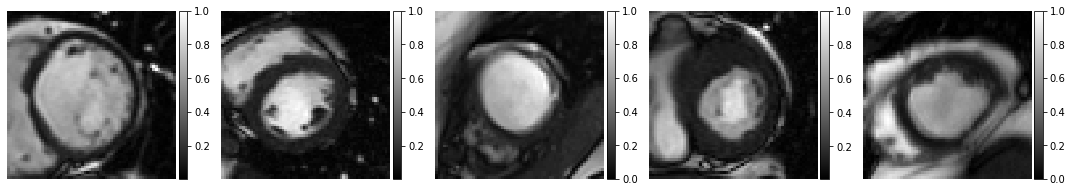

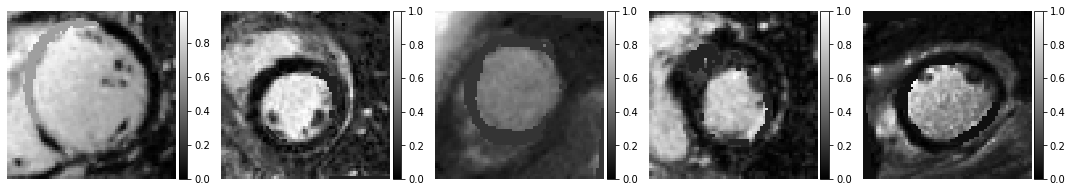

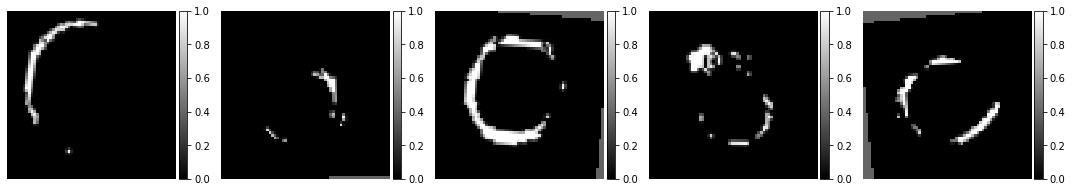

In [11]:
idx = np.random.randint(0, fixed_train.shape[0], size=5)

# visualize
fixed_examples = [f for f in fixed_train[idx, ...]]
moving_examples = [f for f in moving_train[idx, ...]]
masks_examples = [f for f in masks[idx, ...]]

ne.plot.slices(fixed_examples, cmaps=['gray'], do_colorbars=True);
ne.plot.slices(moving_examples, cmaps=['gray'], do_colorbars=True);
ne.plot.slices(masks_examples, cmaps=['gray'], do_colorbars=True);

---

# CNN Model

In [16]:
def vxm_data_generator(fixed_data, moving_data, batch_size=32, indx=[]):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 1], fixed image [bs, H, W, 1]
    outputs: moved image [bs, H, W, 1], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = fixed_data.shape[1:] # extract data shape
    ndims = len(vol_shape)
    
    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])
    
    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        idx = np.random.randint(0, fixed_data.shape[0], size=batch_size)
        if len(indx) > 0:
          idx = indx
        moving_images = moving_data[idx, ..., np.newaxis]
        fixed_images = fixed_data[idx, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
        
        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare 
        # the resulting moved image with the fixed image. 
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
        
        yield (inputs, outputs)

In [17]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [18]:
def get_model(nb_features, lambda_param, adam_rate, batch_size, epochs, steps_per_epoch):
    inshape = fixed_train.shape[1:]
    vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)
    losses = [vxm.losses.NCC().loss, vxm.losses.Grad('l2').loss]
    vxm_model.compile(optimizer=tf.keras.optimizers.Adam(lr=adam_rate), loss=losses, loss_weights=[1, lambda_param])
    train_generator = vxm_data_generator(fixed_train, moving_train, batch_size=batch_size)
    hist = vxm_model.fit_generator(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, verbose=2);
    return vxm_model, hist

# Train Models

In [19]:
nb_features = [
    [16, 32, 32, 32, 64, 64],         # encoder features
    [64, 64, 32, 32, 32, 32, 32, 16, 16]  # decoder features
]

In [20]:
vxm_models = []
hists = []
lams = [0.01]
for i, lam in enumerate(lams):
    print()
    print("model number", i, " with lambda = ", lam, ":")
    vxm_model, hist = get_model(nb_features, lambda_param=lam, adam_rate=1e-3, batch_size=4, epochs=2000, steps_per_epoch=200)
    vxm_models.append(vxm_model)
    hists.append(hist)


model number 0  with lambda =  0.01 :
Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2000
200/200 - 38s - loss: -3.7670e-01 - vxm_dense_transformer_loss: -3.7764e-01 - vxm_dense_flow_loss: 0.0946
Epoch 2/2000
200/200 - 3s - loss: -5.0451e-01 - vxm_dense_transformer_loss: -5.0849e-01 - vxm_dense_flow_loss: 0.3978
Epoch 3/2000
200/200 - 3s - loss: -5.5337e-01 - vxm_dense_transformer_loss: -5.5863e-01 - vxm_dense_flow_loss: 0.5257
Epoch 4/2000
200/200 - 3s - loss: -5.8077e-01 - vxm_dense_transformer_loss: -5.8675e-01 - vxm_dense_flow_loss: 0.5985
Epoch 5/2000
200/200 - 3s - loss: -5.9775e-01 - vxm_dense_transformer_loss: -6.0448e-01 - vxm_dense_flow_loss: 0.6725
Epoch 6/2000
200/200 - 3s - loss: -6.1577e-01 - vxm_dense_transformer_loss: -6.2283e-01 - vxm_dense_flow_loss: 0.7066
Epoch 7/2000
200/200 - 3s - loss: -6.2597e-01 - vxm_dense_transformer_loss: -6.3350e-01 - vxm_dense_flow_loss: 0.7533
Epoch 8/2000
200/200 - 3s - loss: -6.4032e-01 - vxm_dense_transformer_loss: -6.4804e-01 - vxm_dense_flow_loss: 0.7722
Epoch 9/2000
200/200 - 3s - loss: -6.4906e-01 - vxm_den

# Show Results

In [21]:
def show(vxm_model, moving_img, fixed_img, indx):
    for i in indx:
        # get some data
        val_generator = vxm_data_generator(fixed_train, moving_train, batch_size=1, indx=[i])
        val_input, _ = next(val_generator)
        val_pred = vxm_model.predict(val_input)
        mask_before = masks[[i], ..., np.newaxis]
        mask_after = vxm.layers.SpatialTransformer(interp_method='linear', indexing='ij', name='%s_transformer' % 'vxm_dense')([mask_before, val_pred[1]]).numpy()

        # visualize
        images = [img[0, :, :, 0] for img in val_input + [val_pred[0]] + [mask_before, mask_after]] 
        titles = ['moving', 'fixed', 'moved', 'mask_before', 'mask_after']
        ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

model number 0  with lam =  0.01 : 


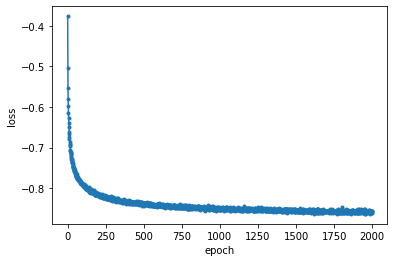

-0.8573938608169556


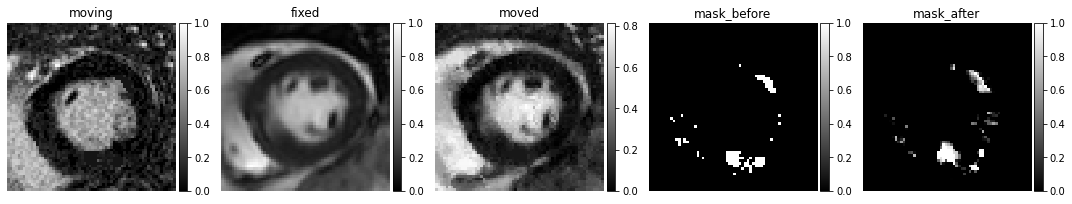

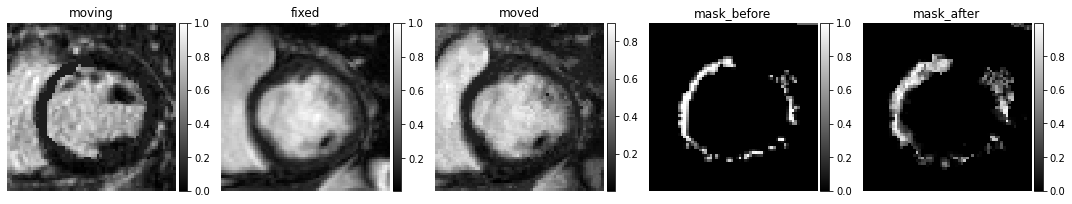

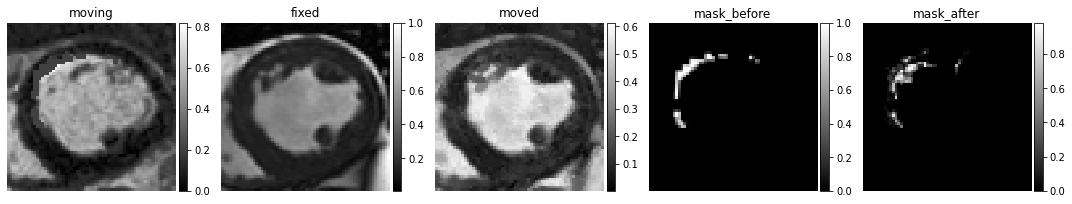

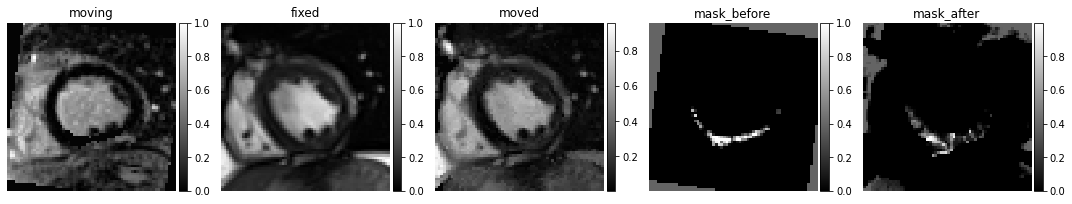

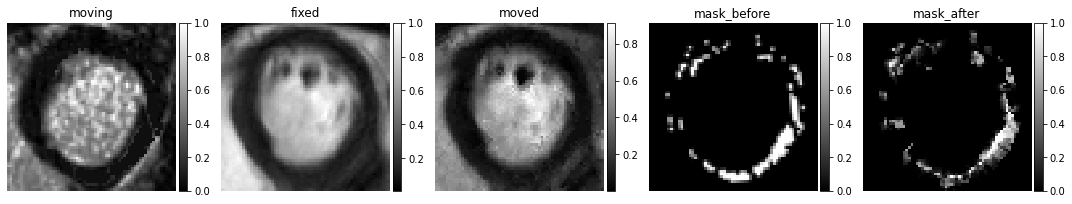

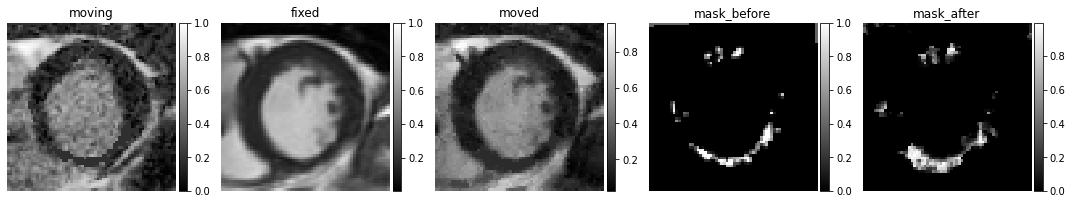

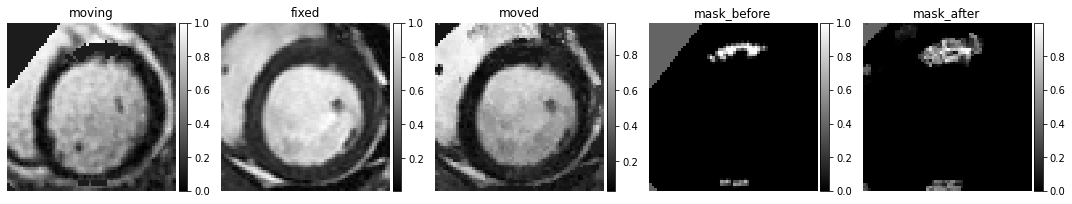

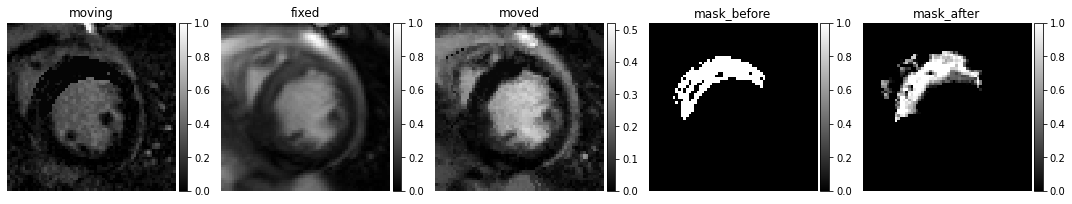

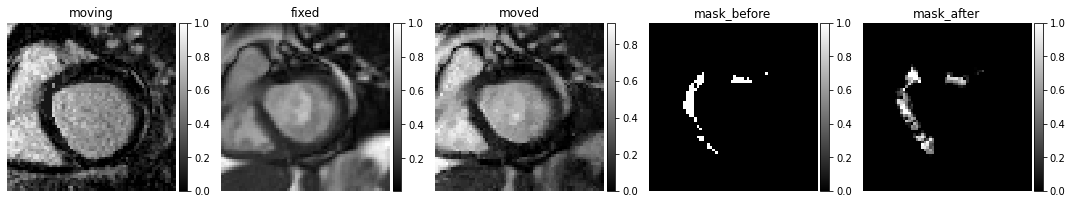

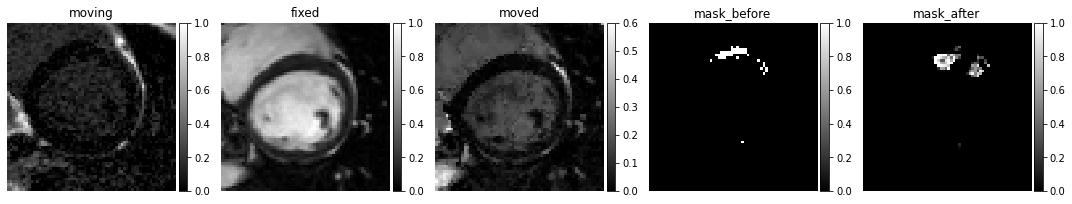

----------------------------------------------------------------------



In [22]:
# indx = np.random.randint(0, fixed_train.shape[0], size=1)
indx = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i, vxm_model in enumerate(vxm_models):
    print("model number", i, " with lam = ", lams[i], ": ")
    plot_history(hists[i])
    print(hists[i].history['loss'][-1])
    show(vxm_model=vxm_model, moving_img=moving_train, fixed_img=fixed_train, indx=indx)
    print("----------------------------------------------------------------------")
    print()